# Exploration of Support Vector Machines 
## Support Vector Machine on 1D Categorical Data from Scratch

In this exploration I will create my own support vector machine using dummy data. The data consists of different dosages of a drug and whether or not they are effective in curing the illness.

In this process I will create a rudimentary SVM using a soft margin. It beings with transforming the data from 1D to 2D and shifting it to the center of the axes. Then I will test out all possible horizontal linear classifiers to find the one with the best accuracy.

SVM's fix the problem of high bias in traditional support vector classifiers/ maximal margin classifiers. However, since this dummy data set is very small and there is not train/test split the is a high chance the model I create will have high bias. 

In [394]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [395]:
#Build Dummy Data Set
df = pd.DataFrame(
    {"Dosage" : [1.1, 1.5, 1.7, 2.1, 2.5, 2.7, 3.1, 3.5, 3.8, \
                 4.2, 4.6, 4.9, 5.0, 5.6, 5.9, 6.1, 6.7, 6.9, \
                 7.0, 7.4, 7.8, 8.1, 8.5, 8.8, 9.3, 9.7, 9.7, \
                 10.1, 10.5, 10.8], 
     "Effective" : [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, \
                   1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ]})

### Data Exploration

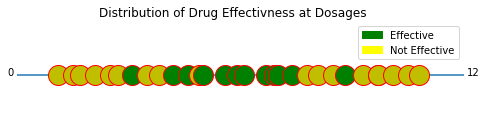

In [396]:
#GRAPH THE DATA ON NUMBER LINE 

# set up the figure
fig = plt.figure(figsize=(8,2))
ax = fig.add_subplot(111)
ax.set_xlim(0,12)

# draw lines
xmin = 0
xmax = 12
y = 0
plt.hlines(y, xmin, xmax)

# draw a point on the line
for row in df.itertuples():
    px = row[1]
    if row[2] == 0:
        plt.plot(px, y , 'ro', ms = 20, mfc = 'y')
    else:
        plt.plot(px, y , 'ro', ms = 20, mfc = 'g')

# add numbers
plt.text(xmin - 0.1, y, '0', horizontalalignment='right')
plt.text(xmax + 0.1, y, '12', horizontalalignment='left')

fig.suptitle('Distribution of Drug Effectivness at Dosages')
green_patch = mpatches.Patch(color='green', label='Effective')
yellow_patch = mpatches.Patch(color='yellow', label='Not Effective')
plt.legend(handles=[green_patch, yellow_patch])
plt.axis('off')

plt.show()

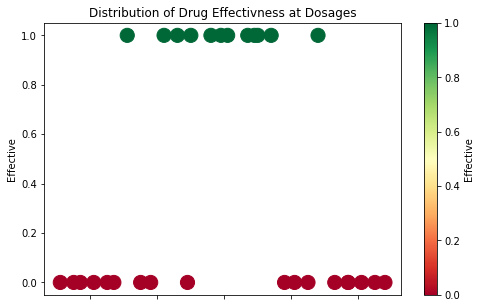

In [397]:
ax1 = df.plot.scatter(x='Dosage', y='Effective', c='Effective', colormap='RdYlGn', 
                      s = 200, figsize=(8,5), title = "Distribution of Drug Effectivness at Dosages")

From the graphs above we can see that low dosages and high dosages of this fake drug are not effective in treating the illness. There is a sweet spot right in the middle that is the effective dosages.
Because of this distribution it is hard to find a linear logistic classifier.

### Transformation 1D --> 2D
The next step is to transform this data to a higher dimension to be able to run a logistic regression classifier on multivariate data.

In [398]:
#simple tranformation fo the data (1D --> 2D): (dosage - 6) ** 2 
df["transform"] = [(d - 6)**2 for d in df["Dosage"]]
df.head()

,Dosage,Effective,transform
0,1.1,0,24.01
1,1.5,0,20.25
2,1.7,0,18.49
3,2.1,0,15.21
4,2.5,0,12.25


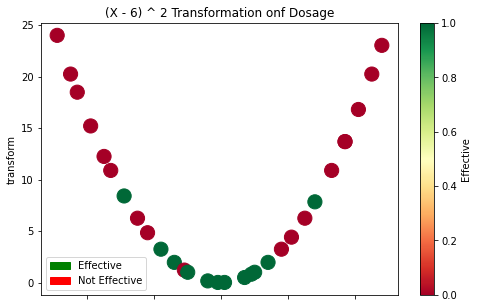

In [399]:
#plot transformed data (1D --> 2D)
ax2 = df.plot.scatter(x='Dosage', y='transform', c='Effective', colormap='RdYlGn', 
                      s = 200, figsize=(8,5), title = "(X - 6) ^ 2 Transformation onf Dosage")

green_patch = mpatches.Patch(color='green', label='Effective')
yellow_patch = mpatches.Patch(color='red', label='Not Effective')
legend = ax2.legend(handles=[green_patch, yellow_patch])

The graph above is just one 1D --> 2D transformation of the data. This transformation can help when creating the support vector classifier because it creates another dimention to split the data on which in this case is helpful because the effective dosage is sandwich-ed inbetween the ineffective dosage amounts so drawing just one boundry line is not possible.

### Sample Linear Classifier
The next step to to draw one possible boundry line for the classifier. The lines in this exploration will be horizontal lines. This line will take two random points, one from each group, and find the midpoint y value to maximize the margins between each point and the boundry. Next is to calculate the precision and recall of all the points in the training set for that boundry line.

In [400]:
#find sample boundry line
point1 = (4.9, 1.2) #first point in dataset
point2 = (5.0, 1.0) #last point in dataset
y = (point1[1] + point2[1]) / 2

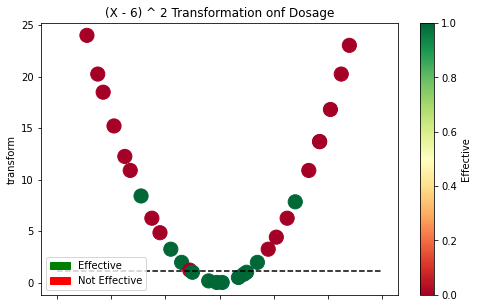

In [401]:
#plot graph with boundry line
ax2 = df.plot.scatter(x='Dosage', y='transform', c='Effective', colormap='RdYlGn', 
                      s = 200, figsize=(8,5), title = "(X - 6) ^ 2 Transformation onf Dosage")

green_patch = mpatches.Patch(color='green', label='Effective')
yellow_patch = mpatches.Patch(color='red', label='Not Effective')
legend = ax2.legend(handles=[green_patch, yellow_patch])
line = plt.hlines(y, 0, 12, linestyles = "dashed", colors = "black")

In [402]:
#FUNCTIONS TO CALLCULATE METRICS

#calculate precision
def precision(predictions, actual):
    tp = 0
    fp = 0
    for i in range(len(predictions)):
        if predictions[i] == 1:
            if actual[i] == 1:
                tp = tp + 1
            else:
                fp = fp + 1

    return tp / (tp + fp)


#calculate recall
def recall(predictions, actual):
    tp = 0
    fn = 0
    for i in range(len(predictions)):
        if predictions[i] == 1:
            if actual[i] == 1:
                tp = tp + 1
        elif predictions[i] == 0:
            if actual[i] == 1:
                fn = fn + 1

    return tp / (tp + fn)


#calculate accuracy
def accuracy(predictions, actual):
    correct = 0
    incorrect = 0
    for i in range(len(predictions)):
        if predictions[i] == actual[i]:
            correct = correct + 1
        else:
            incorrect = incorrect + 1

    return correct / (incorrect + correct)

In [403]:
predictions = [1 if dosage <= y else 0 for dosage in df["transform"]]
actual = df["Effective"].to_list()

print("Precision is: ", precision(predictions, actual))
print("Recall is: ", recall(predictions, actual))
print("Accuracy is: ", accuracy(predictions, actual))

Precision is:  1.0
Recall is:  0.5833333333333334
Accuracy is:  0.8333333333333334


### Full Support Vector Machine
Now that we I have done a full example of just one type of transformation and one support vector classifier (soft margin classifier) I will not run it on multiple different transformations and all possible horizontal SVC's to find the one with the highest accuracy for this dataset. 

In [404]:
#CREATE MULTIPLE DIFFERENT TRANSFORMATIONS
for i in range(0,10):
    for j in [2,4]:
        name = "(x - " + str(i) + ")**" + str(j)
        df[name] = [(x - i)**j for x in df["Dosage"]]
df.head()

,Dosage,Effective,transform,(x - 0)**2,(x - 0)**4,(x - 1)**2,(x - 1)**4,(x - 2)**2,(x - 2)**4,(x - 3)**2,...,(x - 5)**2,(x - 5)**4,(x - 6)**2,(x - 6)**4,(x - 7)**2,(x - 7)**4,(x - 8)**2,(x - 8)**4,(x - 9)**2,(x - 9)**4
0,1.1,0,24.01,1.21,1.4641,0.01,0.0001,0.81,0.6561,3.61,...,15.21,231.3441,24.01,576.4801,34.81,1211.7361,47.61,2266.7121,62.41,3895.0081
1,1.5,0,20.25,2.25,5.0625,0.25,0.0625,0.25,0.0625,2.25,...,12.25,150.0625,20.25,410.0625,30.25,915.0625,42.25,1785.0625,56.25,3164.0625
2,1.7,0,18.49,2.89,8.3521,0.49,0.2401,0.09,0.0081,1.69,...,10.89,118.5921,18.49,341.8801,28.09,789.0481,39.69,1575.2961,53.29,2839.8241
3,2.1,0,15.21,4.41,19.4481,1.21,1.4641,0.01,0.0001,0.81,...,8.41,70.7281,15.21,231.3441,24.01,576.4801,34.81,1211.7361,47.61,2266.7121
4,2.5,0,12.25,6.25,39.0625,2.25,5.0625,0.25,0.0625,0.25,...,6.25,39.0625,12.25,150.0625,20.25,410.0625,30.25,915.0625,42.25,1785.0625


In [405]:
df_0 = df.loc[df['Effective'] == 0]
df_1 = df.loc[df['Effective'] == 1]
bestAccuracy = 0
bestCol = ""
bestY = 0

for col in df.columns[3:]:
    thresholds = []
    label_0 = df_0[col].to_list()
    label_1 = df_1[col].to_list()
    
    for p1 in label_0:
        for p2 in label_1:
            thresholds.append((p1+p2)/2)
    
    for y in thresholds:
        predictions = [1 if dosage <= y else 0 for dosage in df[col]]
        actual = df["Effective"].to_list()

        cur_accuracy = accuracy(predictions, actual)
        if cur_accuracy > bestAccuracy:
            bestAccuracy = cur_accuracy
            bestCol = col
            bestY = y
    
            
print("BestAccuracy is: ", bestAccuracy)
print("Column is: ", bestCol)
print("Threshold is: ", bestY)

BestAccuracy is:  0.8666666666666667
Column is:  (x - 6)**2
Threshold is:  4.105


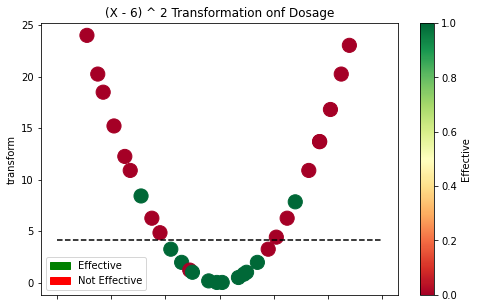

In [406]:
#PLOT GRAPH WITH BEST TRANSFORMATION AND SUPPORT VECTOR CLASSIFIER USING SOFT MARGINS
ax2 = df.plot.scatter(x='Dosage', y='transform', c='Effective', colormap='RdYlGn', 
                      s = 200, figsize=(8,5), title = "(X - 6) ^ 2 Transformation onf Dosage")

green_patch = mpatches.Patch(color='green', label='Effective')
yellow_patch = mpatches.Patch(color='red', label='Not Effective')
legend = ax2.legend(handles=[green_patch, yellow_patch])
line = plt.hlines(4.105, 0, 12, linestyles = "dashed", colors = "black")

### Conclusion
In doing this project I have a better understanding of why we use SVM. However, next steps of this would be to parse the source code for sklearn's SVM classifier and understand how they determine which kernel transformation is best.